In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as data
import yfinance as yf

In [9]:
start = '2010-01-01'
end = '2024-6-30'

df = yf.download('BTC-USD', start ,end )
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [10]:
df.shape

(3570, 6)

In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-21,64837.988281,65007.546875,63378.894531,64096.199219,64096.199219,26188171739
2024-06-22,64113.863281,64475.468750,63929.757812,64252.578125,64252.578125,9858198793
2024-06-23,64248.964844,64491.703125,63180.796875,63180.796875,63180.796875,11170471802
2024-06-24,63173.351562,63292.527344,58601.699219,60277.414062,60277.414062,43152133651
2024-06-25,60266.281250,61555.753906,60259.937500,61056.175781,61056.175781,42126778368


In [12]:
df = df.reset_index()

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3565,2024-06-21,64837.988281,65007.546875,63378.894531,64096.199219,64096.199219,26188171739
3566,2024-06-22,64113.863281,64475.468750,63929.757812,64252.578125,64252.578125,9858198793
3567,2024-06-23,64248.964844,64491.703125,63180.796875,63180.796875,63180.796875,11170471802
3568,2024-06-24,63173.351562,63292.527344,58601.699219,60277.414062,60277.414062,43152133651


In [14]:
df.drop(['Date' , 'Adj Close'], axis= 1, inplace  = True)

In [15]:
df

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
3565,64837.988281,65007.546875,63378.894531,64096.199219,26188171739
3566,64113.863281,64475.468750,63929.757812,64252.578125,9858198793
3567,64248.964844,64491.703125,63180.796875,63180.796875,11170471802
3568,63173.351562,63292.527344,58601.699219,60277.414062,43152133651


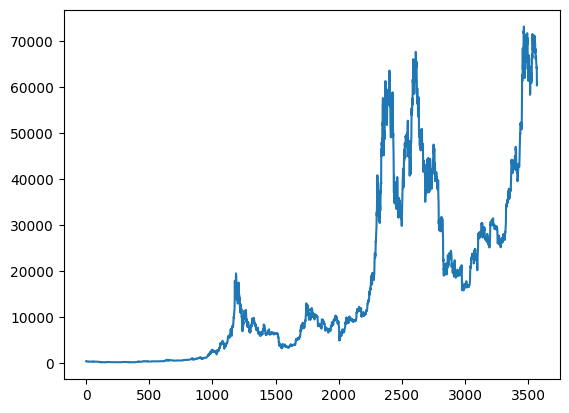

In [16]:
plt.plot(df['Close'])

In [17]:
ma100 = df.Close.rolling(100).mean()
print(ma100)

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3565    66443.603125
3566    66372.162969
3567    66309.933203
3568    66259.556172
3569    66186.211680
Name: Close, Length: 3570, dtype: float64


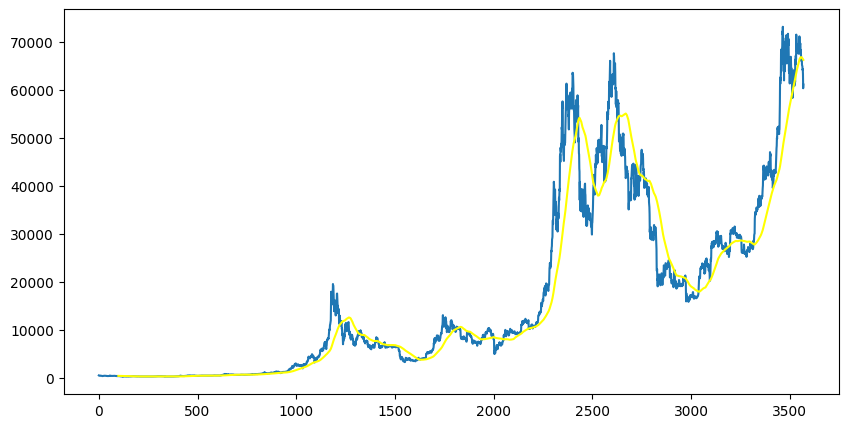

In [18]:
plt.figure(figsize= (10,5))
plt.plot(df.Close)
plt.plot(ma100 , color = 'yellow')
plt.show()

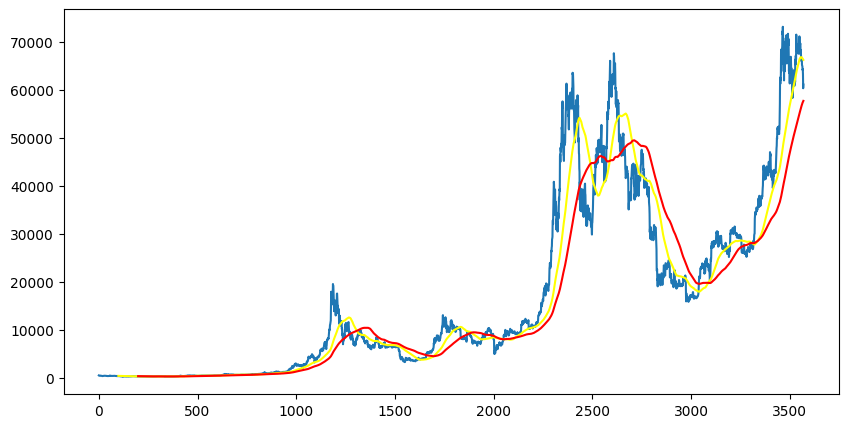

In [19]:
ma200= df.Close.rolling(200).mean()
plt.figure(figsize= (10,5))
plt.plot(df.Close)
plt.plot(ma100 , color = 'yellow')
plt.plot(ma200 , color = 'red')

plt.show()

In [20]:
#spltting data into train test
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(' taining ', data_training.shape)
print(' testing ', data_testing.shape)

 taining  (2499, 1)
 testing  (1071, 1)


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)

In [23]:
data_training_array

array([[0.00440947],
       [0.00389002],
       [0.0034219 ],
       ...,
       [0.49930566],
       [0.48384615],
       [0.46788913]])

In [24]:
x_train = []
y_train = []

for i in range(100 ,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
#ML model
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [26]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [27]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 50 )

Epoch 1/50
75/75 [==============================] - 47s 524ms/step - loss: 0.0134
Epoch 2/50
75/75 [==============================] - 38s 514ms/step - loss: 0.0037
Epoch 3/50
75/75 [==============================] - 37s 500ms/step - loss: 0.0034
Epoch 4/50
75/75 [==============================] - 37s 499ms/step - loss: 0.0027
Epoch 5/50
75/75 [==============================] - 37s 497ms/step - loss: 0.0031
Epoch 6/50
75/75 [==============================] - 37s 495ms/step - loss: 0.0030
Epoch 7/50
75/75 [==============================] - 39s 520ms/step - loss: 0.0026
Epoch 8/50
75/75 [==============================] - 37s 490ms/step - loss: 0.0024
Epoch 9/50
75/75 [==============================] - 37s 484ms/step - loss: 0.0029
Epoch 10/50
75/75 [==============================] - 37s 493ms/step - loss: 0.0022
Epoch 11/50
75/75 [==============================] - 37s 496ms/step - loss: 0.0025
Epoch 12/50
75/75 [==============================] - 37s 496ms/step - loss: 0.0023
Epoch 13/50
7

In [29]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
data_testing.head()

,Close
2499,32110.693359
2500,32313.105469
2501,33581.550781
2502,34292.445312
2503,35350.187500


In [31]:
pass_100_days = data_training.tail(100)

In [32]:
final_df = pd.concat([pass_100_days, data_testing], ignore_index=True)

In [33]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.76979201],
       [0.83279798],
       [0.82592559],
       ...,
       [0.82716654],
       [0.77649334],
       [0.79008519]])

In [35]:
input_data.shape


(1171, 1)

In [36]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [37]:
x_test, y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1071, 100, 1)
(1071,)


In [38]:
#make prediction

y_predicted = model.predict(x_test)

34/34 [==============================] - 3s 61ms/step


In [39]:

y_predicted.shape

(1071, 1)

In [40]:
y_test

array([0.28489507, 0.2884278 , 0.31056618, ..., 0.82716654, 0.77649334,
       0.79008519])

In [41]:

y_predicted

array([[0.26721963],
       [0.2618245 ],
       [0.25817275],
       ...,
       [0.78831565],
       [0.78367674],
       [0.7761252 ]], dtype=float32)